In [3]:
#THINGS TO REMEMBER
#specific info: blue zone deaths, high kill zones, compare (solo, duo, and squad games), correlate by placements(0-20, 21-40, etc.) 

#useful links: https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/ , https://github.com/data-8/materials-x19/blob/master/reference/Datascience%20to%20Pandas%20Conversion%20Notebook.ipynb

# Updates
- 3.26 - Applied brackets for each game mode
- 3.21 - Split by game mode
- 3.20 - Added indexes for game_id
- 3.16 - Removed long string in 'date' column
- 3.14 - Created notebook

# Aggregate Manipulation 

For each game mode, will look into
- Average time walking/riding per second in both positions and brackets
- Average kills in both positions and brackets
- Relation of survive_time and team_placement

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg 
map_img = mpimg.imread('img/erangel.jpg') 
%matplotlib inline
agg = pd.read_csv('original data/aggregate.csv')
agg['date'] = agg['date'].str.split('+').str[0]  #removes +00:00 in 'date' column

#converts agg match_id's to endexes
ids = agg["match_id"].unique()
indices = np.arange(ids.size)
id_table = pd.DataFrame({
    'id' : ids,
    'game_id' : indices
})
agg = agg.merge(id_table, left_on="match_id", right_on="id").drop(columns=['match_id', 'id','Unnamed: 0', 'date', 'game_size', 'match_mode'])


#Games by team size
solo = agg[agg['party_size'] == 1].drop(columns = ['party_size']).reset_index(drop=True) #Solo games
duos = agg[agg['party_size'] == 2].drop(columns = ['party_size']).reset_index(drop=True) #Duo games
squads = agg[agg['party_size'] == 4].drop(columns = ['party_size']).reset_index(drop=True) #Squad games
agg.columns

Index(['party_size', 'player_assists', 'player_dbno', 'player_dist_ride',
       'player_dist_walk', 'player_dmg', 'player_kills', 'player_name',
       'player_survive_time', 'team_id', 'team_placement', 'game_id'],
      dtype='object')

# agg1 - Solo games

In [52]:
#solo with brackets 
def soloplacement(placement):
    if placement == 100:
        return 5
    else:
        bracket = placement//20
        return bracket+1

solo['bracket'] = solo['team_placement'].apply(soloplacement)
soloplacement = solo.groupby('team_placement').mean()
solobracket = solo.groupby('bracket').mean()

Average time walking/riding per second in both positions and brackets

## Average time walking

In [38]:
solobracket['walk_per_min'] = solobracket['player_dist_walk'] / (solobracket['player_survive_time'] / 60)

bracket
1    101.439509
2    109.093990
3     95.558145
4     63.603854
5     19.719320
Name: walk_per_min, dtype: float64

In [ ]:
sns.boxplot(y='bracket', x='player_dist_walk', data=solo)

### Average kills
Average for each bracket and team_placement
#### By bracket

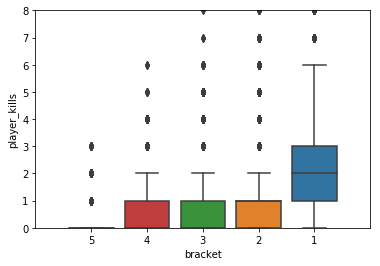

In [71]:
sns.boxplot(y='player_kills', x='bracket', data=solo).set(xlim=(5,-1), ylim=(0,8));

#### By team_placement

###### 5th Bracket
Interesting to note the max is 3

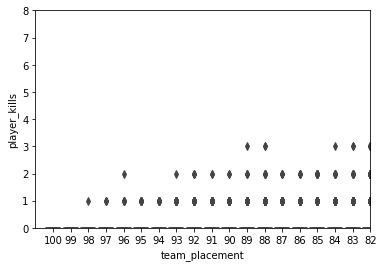

In [74]:
sns.boxplot(y='player_kills', x='team_placement', data=solo).set(xlim=(100,81), ylim=(0,8));

###### 4th Bracket
By 70, we see at least 25 percent have kills of at least 1.

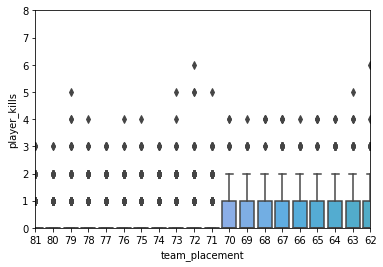

In [64]:
sns.boxplot(y='player_kills', x='team_placement', data=solo).set(xlim=(80,61), ylim=(0,8));

###### 3rd Bracket
No change

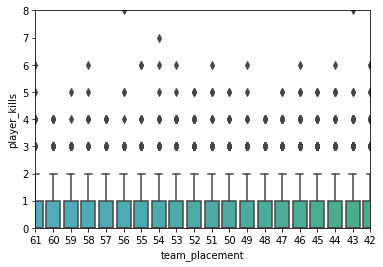

In [65]:
sns.boxplot(y='player_kills', x='team_placement', data=solo).set(xlim=(60,41), ylim=(0,8));

###### 2nd Bracket
By 29, 25% have at least 2 kills

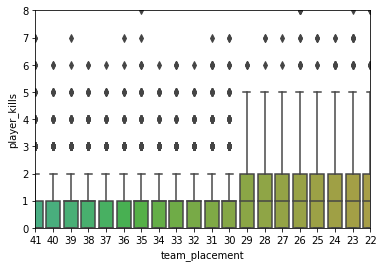

In [66]:
sns.boxplot(y='player_kills', x='team_placement', data=solo).set(xlim=(40,21), ylim=(0,8));

###### 1st Bracket
By 8, 75% of players has at least one kill, and by 1, 75% of them have 4 kills

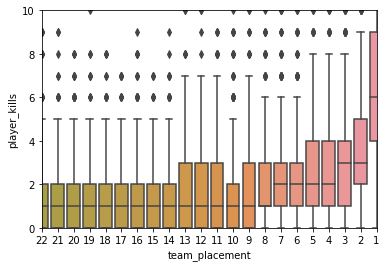

In [68]:
sns.boxplot(y='player_kills', x='team_placement', data=solo).set(xlim=(21,0), ylim=(0,10));

In [24]:
sns.lmplot(x='age', y='fare', data=agg1);

KeyError: "['age' 'fare'] not in index"

# 

## agg4

/Users/franco/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


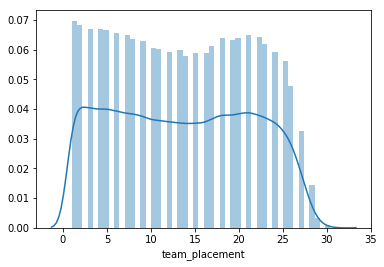

In [4]:
sns.distplot(agg4['']);

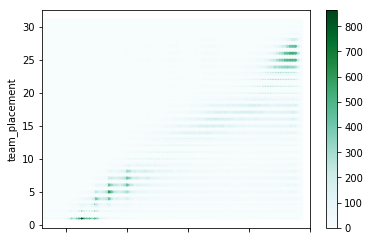

In [2]:
agg4.plot(x = 'player_survive_time', y = 'team_placement', kind = 'hexbin', xlim = (2200, 0));

In [13]:
agg4

,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement,game_id
0,0,0,0.000000,50.959732,0,0,AMMB,193.470,1,23,1
1,1,0,0.000000,394.899300,24,0,2312123102,417.742,1,23,1
2,0,1,0.000000,533.873840,135,1,15660629131,417.738,1,23,1
3,0,0,935.086200,32.406124,0,0,LI--XX,203.138,1,23,1
4,2,1,683.999500,3414.092770,65,1,joyside-one,1487.702,2,2,1
5,0,0,833.730200,2421.380000,0,0,R011sRoyce,1139.562,2,2,1
6,0,5,2580.474000,3579.407710,605,7,LOLdeUzi,1734.999,2,2,1
7,1,1,2061.434330,2541.614500,494,2,ZJDUSTYBLUE,1855.647,2,2,1
8,0,0,860.921800,1278.535890,2,0,prepurge,924.161,3,8,1
9,0,0,919.972400,3342.178220,172,1,12GG,1432.886,3,8,1


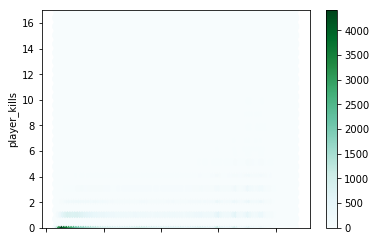

In [3]:
agg4.plot(x = 'player_survive_time', y = 'player_kills', kind = 'hexbin', ylim = (0,17));

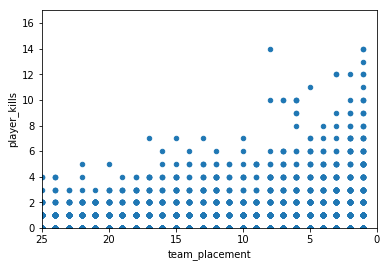

In [11]:
game100agg4.plot(x = 'team_placement', y = 'player_kills', kind = 'scatter', xlim = (25, 0), ylim = (0,17))

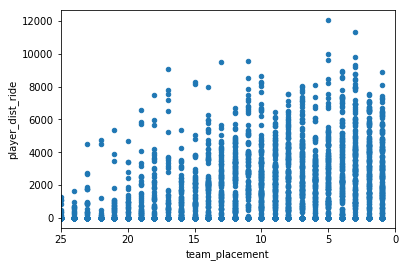

In [12]:
game100agg4.plot(x = 'team_placement', y = 'player_dist_ride', kind = 'scatter', xlim = (25, 0))

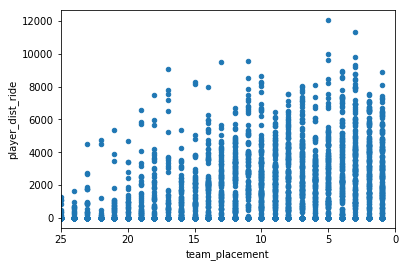

In [13]:
game100agg4.plot(x = 'team_placement', y = 'player_dist_ride', kind = 'scatter', xlim = (25, 0))

## agg4 placement means

In [14]:
agg4placement = agg4.groupby('team_placement').mean()
agg4placement

,Unnamed: 0,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,game_id
team_placement,,,,,,,,,,,,
1,1.402762e+07,25.809164,4.0,1.099031,2.259156,2995.420948,2866.668253,365.712432,3.088520,1786.605442,14.504681,1722.907374
2,1.398717e+07,25.827823,4.0,0.704313,1.483303,2839.302612,2626.048939,243.814063,1.784528,1576.315934,14.608324,1717.917268
3,1.395767e+07,25.856240,4.0,0.624040,1.359570,2780.002663,2626.519449,221.635991,1.618918,1507.548512,14.836094,1714.298276
4,1.398053e+07,25.829431,4.0,0.499231,1.150060,2671.943093,2480.732302,185.296872,1.310887,1433.608146,14.336865,1717.153478
5,1.405880e+07,25.822203,4.0,0.443029,1.096558,2642.482359,2655.321143,173.880895,1.217212,1375.423509,14.371084,1726.821170
6,1.403338e+07,25.840119,4.0,0.406255,1.001573,2511.140111,2405.375565,158.427049,1.087716,1300.920430,14.346497,1723.669754
7,1.407209e+07,25.866138,4.0,0.380952,0.976896,2441.761881,2139.443463,153.722751,1.044621,1234.441850,14.462081,1728.467196
8,1.404069e+07,25.931806,4.0,0.348909,0.940826,2246.251187,2056.310194,144.033195,0.971856,1174.196816,14.553671,1724.541764
9,1.393285e+07,25.922840,4.0,0.306826,0.848765,2209.852075,1914.377261,130.700254,0.852578,1101.416219,14.229847,1711.144154


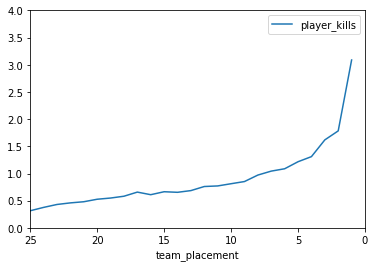

In [16]:
agg4placement.plot(y = 'player_kills', kind = 'line', xlim = (25, 0), ylim = (0,4))

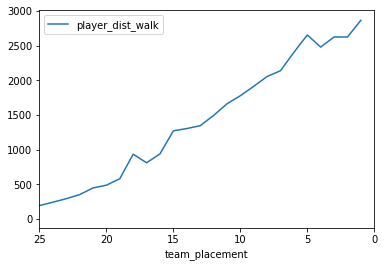

In [17]:
agg4placement.plot(y = 'player_dist_walk', kind = 'line', xlim = (25, 0))

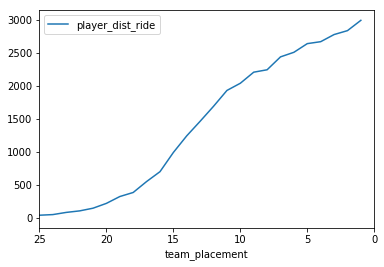

In [18]:
agg4placement.plot(y = 'player_dist_ride', kind = 'line', xlim = (25, 0))

In [11]:
agg2placement = agg2.groupby('team_placement').mean()
agg2placement

,Unnamed: 0,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,game_id
team_placement,,,,,,,,,,,,
1,1.329942e+07,46.380579,2.0,1.068661,2.177538,3175.851701,3026.630621,515.830799,4.574792,1861.094404,24.648357,1632.320255
2,1.328972e+07,46.369789,2.0,0.651790,1.399215,2954.649021,2764.346848,329.721923,2.642962,1738.141392,26.733693,1631.120157
3,1.328272e+07,46.376476,2.0,0.615157,1.286909,3001.061180,2742.926203,289.073327,2.305118,1696.164598,25.690945,1630.248031
4,1.325956e+07,46.382789,2.0,0.507418,1.086053,2795.318626,2636.836914,246.167161,1.934224,1616.933386,26.967854,1627.365480
5,1.327499e+07,46.374200,2.0,0.477105,1.037912,2913.076485,3038.158288,233.401280,1.815854,1562.779959,26.812408,1629.272280
6,1.327576e+07,46.364532,2.0,0.403941,0.909852,2751.509105,2810.610301,205.377833,1.594581,1510.899384,25.706897,1629.388177
7,1.331927e+07,46.378285,2.0,0.353991,0.879028,2806.791900,2451.465054,194.089737,1.482895,1458.107565,26.348537,1634.828458
8,1.330731e+07,46.416044,2.0,0.343797,0.830593,2620.487278,2542.522081,185.470354,1.413553,1412.234903,26.409068,1633.323866
9,1.326833e+07,46.355992,2.0,0.338872,0.806647,2529.194427,2412.314696,172.892246,1.297583,1373.673513,26.883686,1628.470292


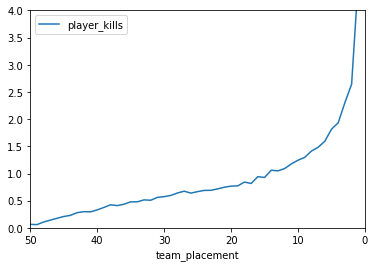

In [12]:
agg2placement.plot(y = 'player_kills', kind = 'line', xlim = (50, 0), ylim = (0,4))

In [31]:
game100agg1placement = game100agg1.groupby('team_placement').mean()
game100agg1placement.drop(columns = ['Unnamed: 0', 'player_dbno','game_size', 'party_size', 'team_id', 'game_id'])

,player_assists,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time
team_placement,,,,,,
1,0.230769,2664.847351,2897.304749,773.692308,7.230769,1854.240500
2,0.230769,2104.957368,2844.039381,337.384615,3.076923,1854.094500
3,0.192308,3006.786734,2949.792716,400.615385,3.846154,1810.279346
4,0.192308,3366.853484,2697.297353,311.923077,2.692308,1741.621923
5,0.115385,2623.906140,2924.497408,283.500000,2.500000,1710.647500
6,0.346154,2089.667374,3003.670638,293.076923,2.461538,1658.980115
7,0.153846,3422.323115,2733.022141,258.346154,2.269231,1620.636115
8,0.076923,2569.180610,2927.661017,258.769231,2.307692,1591.574500
9,0.115385,3093.946036,2571.564008,161.576923,1.500000,1569.332654


In [64]:
#Team placement solo mean
agg1placement = agg1.groupby('team_placement').mean()
agg1placementmean = agg1placement.drop(columns = ['Unnamed: 0', 'player_dbno','game_size', 'party_size', 'team_id', 'game_id'])

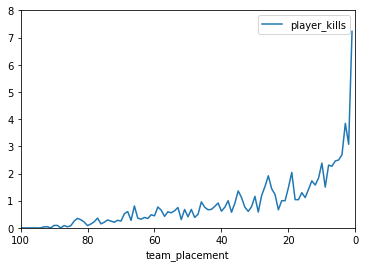

In [32]:

game100agg1placement.plot(y = 'player_kills', kind = 'line', xlim = (100, 0), ylim = (0,8))

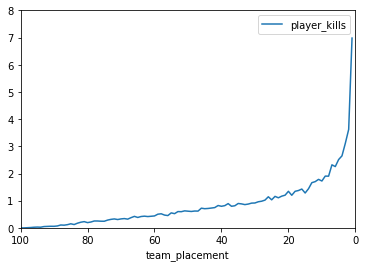

In [37]:
agg1placementmean.plot(y = 'player_kills', kind = 'line', xlim = (100, 0), ylim = (0,8))

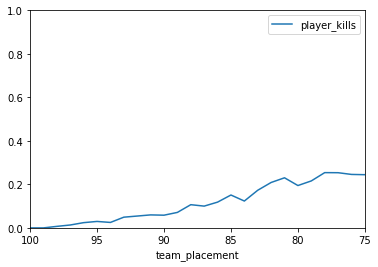

In [40]:
#100 to 75 percentile
agg1placementmean.plot(y = 'player_kills', kind = 'line', xlim = (100, 75), ylim = (0,1))

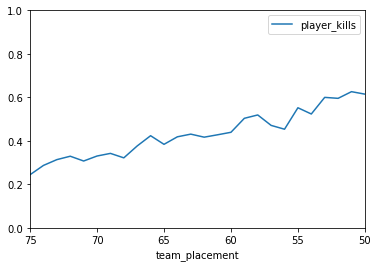

In [42]:
#75 - 50
agg1placementmean.plot(y = 'player_kills', kind = 'line', xlim = (75, 50), ylim = (0,1))

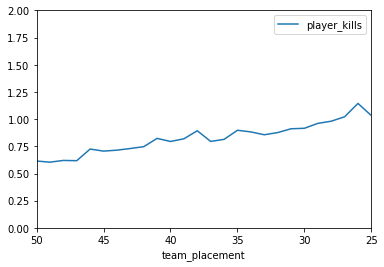

In [47]:
#50 - 25
agg1placementmean.plot(y = 'player_kills', kind = 'line', xlim = (50, 25), ylim = (0,2))

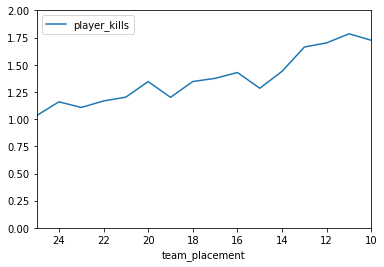

In [48]:
#25-10
agg1placementmean.plot(y = 'player_kills', kind = 'line', xlim = (25, 10), ylim = (0,2))

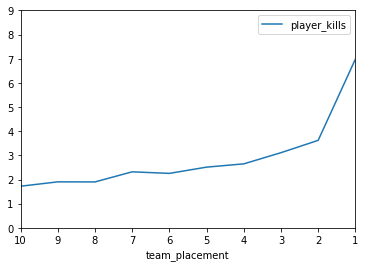

In [51]:
#10-1
agg1placementmean.plot(y = 'player_kills', kind = 'line', xlim = (10, 1), ylim = (0,9))

In [59]:
agg1placementmean[agg1placementmean['player_kills'] < 1]

,player_assists,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time
team_placement,,,,,,
28,0.054676,1551.732662,1798.125128,125.043165,0.981295,1039.561119
29,0.054441,1587.651098,1706.722034,123.187679,0.961318,1014.927093
30,0.074738,1604.904031,1685.675554,117.098655,0.916293,984.772094
31,0.047826,1294.837408,1594.622869,114.395652,0.911594,960.043649
32,0.063142,1252.744848,1650.276561,112.757709,0.876652,928.263483
33,0.064993,1276.443260,1498.033390,112.181684,0.856721,900.479677
34,0.072072,1277.382509,2637.361914,112.399399,0.882883,871.811820
35,0.058309,1232.009419,2513.448274,112.536443,0.897959,848.014117
36,0.045322,1149.368188,1354.730766,105.111111,0.814327,825.673931


In [61]:
agg1placementmean[agg1placementmean['player_kills'] > 1]

,player_assists,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time
team_placement,,,,,,
1,0.243280,2931.883959,3021.357443,725.091398,6.983871,1885.740852
2,0.176075,2732.213403,2862.051162,398.629032,3.623656,1885.594258
3,0.180350,2615.233485,2884.732796,343.438762,3.113055,1829.323194
4,0.175439,2691.187138,2788.410242,296.479082,2.650472,1772.426201
5,0.159946,2668.693659,2764.649385,288.822581,2.514785,1729.508304
6,0.101626,2574.725880,2758.082054,255.275068,2.256098,1690.659890
7,0.117727,2663.919506,2770.753849,259.967524,2.320704,1654.874437
8,0.106613,2506.831202,2728.472029,222.012146,1.902834,1618.664945
9,0.095687,2408.195932,2678.772545,216.024259,1.905660,1586.792127


In [62]:
agg1placementmean

66806